<a href="https://colab.research.google.com/github/Fazloussatter/Relative-Strength-Index-RSI-in-Python.ipynb/blob/main/Relative_Strength_Index_(RSI)_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing essential libaries

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf



In [2]:
ticker=("NVDA")
start=dt.datetime(2021,1,1)
end=dt.datetime(2025,7,10)
data=yf.download(ticker,start,end)

/tmp/ipython-input-2-2231836081.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.columns

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [4]:
delta = data['Close'].diff(1)
data.dropna(inplace=True)

#gain = delta.mask(delta < 0, 0)
#loss = delta.mask(delta > 0, 0).abs()

In [5]:
positive=delta.copy()
negative=delta.copy()
positive[positive<0]=0
negative[negative>0]=0
days=20

In [6]:
average_gain=positive.rolling(window=days).mean()
average_loss=abs(negative.rolling(window=days).mean())
relative_strength=average_gain/average_loss
RSI=100-(100/(1+relative_strength))


In [7]:
combined = pd.DataFrame()
combined["Close"] = data["Close"]
combined["RSI"] = RSI  # Corrected: Changed '-' to '=' to assign the values.

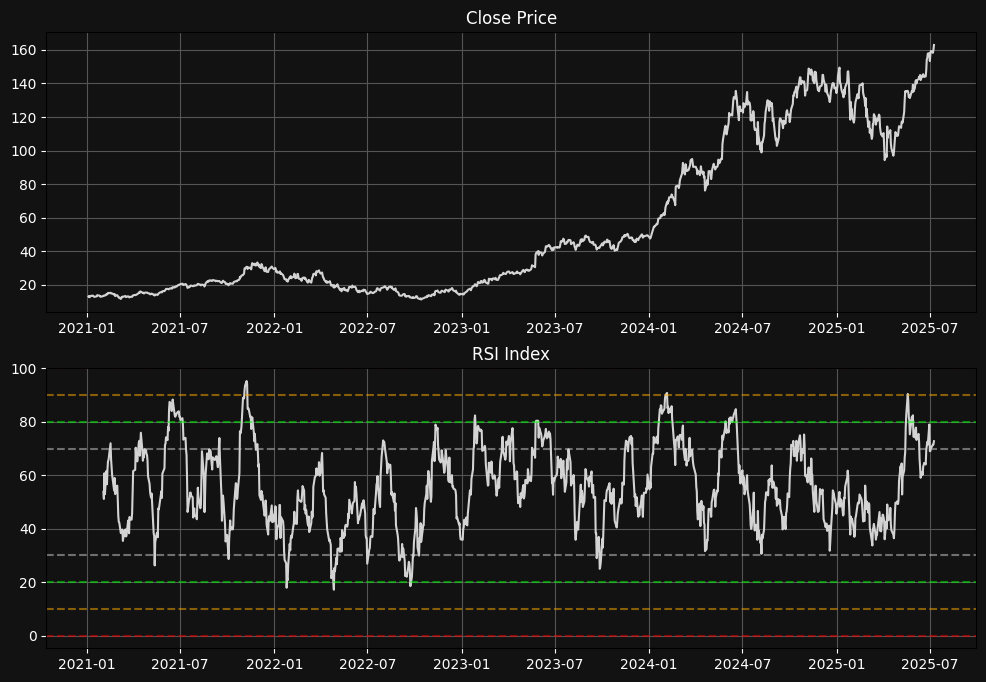

In [8]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Close'], color='lightgray')
ax1.set_title('Close Price', color='white')
ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('#121212')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle='--', alpha=0.5, color='#ff0000')
ax2.set_title('RSI Index', color='white')
ax2.grid(True, color='#555555')
ax2.set_axisbelow(True)
ax2.set_facecolor('#121212')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

plt.show()

In [9]:


# Basic RSI trading strategy recommendations:
# Buy signal: When RSI crosses above 30 (oversold territory).
# Sell signal: When RSI crosses below 70 (overbought territory).
# Disclaimer: This is a basic example and not financial advice.
# Real-world trading requires more complex strategies and risk management.

# Add recommendations based on RSI
combined['Signal'] = 0
combined.loc[combined['RSI'] > 70, 'Signal'] = -1 # Sell signal
combined.loc[combined['RSI'] < 30, 'Signal'] = 1  # Buy signal

print("\nRecommendations based on RSI:")
print(combined[combined['Signal'] != 0][['Close', 'RSI', 'Signal']].tail())


Recommendations based on RSI:
                 Close        RSI  Signal
Date                                     
2025-06-30  157.990005  79.000637      -1
2025-07-03  159.339996  70.094562      -1
2025-07-07  158.240005  71.461966      -1
2025-07-08  160.000000  71.482158      -1
2025-07-09  162.880005  72.743542      -1
